In [3]:
import glob
import numpy as np
import pandas as pd
from tqdm import tqdm
np.random.seed(0)
 
text_paths = glob.glob('data/livedoor-news-corpus/text/**/*.txt')
 
len(text_paths) # 7376

7376

In [4]:
print(open(text_paths[0], 'r').read())

http://news.livedoor.com/article/detail/4778030/
2010-05-22T14:30:00+0900
友人代表のスピーチ、独女はどうこなしている？
　もうすぐジューン・ブライドと呼ばれる６月。独女の中には自分の式はまだなのに呼ばれてばかり……という「お祝い貧乏」状態の人も多いのではないだろうか？　さらに出席回数を重ねていくと、こんなお願いごとをされることも少なくない。

　「お願いがあるんだけど……友人代表のスピーチ、やってくれないかな？」

　さてそんなとき、独女はどう対応したらいいか？

　最近だとインターネット等で検索すれば友人代表スピーチ用の例文サイトがたくさん出てくるので、それらを参考にすれば、無難なものは誰でも作成できる。しかし由利さん（33歳）はネットを参考にして作成したものの「これで本当にいいのか不安でした。一人暮らしなので聞かせて感想をいってくれる人もいないし、かといって他の友人にわざわざ聞かせるのもどうかと思うし……」ということで活用したのが、なんとインターネットの悩み相談サイトに。そこに作成したスピーチ文を掲載し「これで大丈夫か添削してください」とメッセージを送ったというのである。

　「一晩で3人位の人が添削してくれましたよ。ちなみに自分以外にもそういう人はたくさんいて、その相談サイトには同じように添削をお願いする投稿がいっぱいありました」（由利さん）。ためしに教えてもらったそのサイトをみてみると、確かに「結婚式のスピーチの添削お願いします」という投稿が1000件を超えるくらいあった。めでたい結婚式の影でこんなネットコミュニティがあったとは知らなかった。

　しかし「事前にお願いされるスピーチなら準備ができるしまだいいですよ。一番嫌なのは何といってもサプライズスピーチ！」と語るのは昨年だけで10万以上お祝いにかかったというお祝い貧乏独女の薫さん（35歳）

　「私は基本的に人前で話すのが苦手なんですよ。だからいきなり指名されるとしどろもどろになって何もいえなくなる。そうすると自己嫌悪に陥って終わった後でもまったく楽しめなくなりますね」
　
　サプライズスピーチのメリットとしては、準備していない状態なので、フランクな本音をしゃべってもらえるという楽しさがあるようだ。しかしそれも上手に対応できる人なら

In [5]:
import MeCab
 
def analyzer(text, mecab, stopwords=[], target_part_of_speech=['proper_noun', 'noun', 'verb', 'adjective']):
    
    node = mecab.parseToNode(text)
    words = []
    
    while node:
        
        features = node.feature.split(',')
        surface = features[6]
        
        if (surface == '*') or (len(surface) < 2) or (surface in stopwords):
            node = node.next
            continue
            
        noun_flag = (features[0] == '名詞')
        proper_noun_flag = (features[0] == '名詞') & (features[1] == '固有名詞')
        verb_flag = (features[0] == '動詞') & (features[1] == '自立')
        adjective_flag = (features[0] == '形容詞') & (features[1] == '自立')
        
 
        if ('proper_noun' in target_part_of_speech) & proper_noun_flag:
            words.append(surface)
        elif ('noun' in target_part_of_speech) & noun_flag:
            words.append(surface)
        elif ('verb' in target_part_of_speech) & verb_flag:
            words.append(surface)
        elif ('adjective' in target_part_of_speech) & adjective_flag:
            words.append(surface)
        
        node = node.next
        
    return words

In [7]:
import urllib
 
req = urllib.request.Request('http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt')
 
with urllib.request.urlopen(req) as res:
    stopwords = res.read().decode('utf-8').split('\r\n')

while '' in stopwords:
    stopwords.remove('')

print(stopwords)

['あそこ', 'あたり', 'あちら', 'あっち', 'あと', 'あな', 'あなた', 'あれ', 'いくつ', 'いつ', 'いま', 'いや', 'いろいろ', 'うち', 'おおまか', 'おまえ', 'おれ', 'がい', 'かく', 'かたち', 'かやの', 'から', 'がら', 'きた', 'くせ', 'ここ', 'こっち', 'こと', 'ごと', 'こちら', 'ごっちゃ', 'これ', 'これら', 'ごろ', 'さまざま', 'さらい', 'さん', 'しかた', 'しよう', 'すか', 'ずつ', 'すね', 'すべて', 'ぜんぶ', 'そう', 'そこ', 'そちら', 'そっち', 'そで', 'それ', 'それぞれ', 'それなり', 'たくさん', 'たち', 'たび', 'ため', 'だめ', 'ちゃ', 'ちゃん', 'てん', 'とおり', 'とき', 'どこ', 'どこか', 'ところ', 'どちら', 'どっか', 'どっち', 'どれ', 'なか', 'なかば', 'なに', 'など', 'なん', 'はじめ', 'はず', 'はるか', 'ひと', 'ひとつ', 'ふく', 'ぶり', 'べつ', 'へん', 'ぺん', 'ほう', 'ほか', 'まさ', 'まし', 'まとも', 'まま', 'みたい', 'みつ', 'みなさん', 'みんな', 'もと', 'もの', 'もん', 'やつ', 'よう', 'よそ', 'わけ', 'わたし', 'ハイ', '上', '中', '下', '字', '年', '月', '日', '時', '分', '秒', '週', '火', '水', '木', '金', '土', '国', '都', '道', '府', '県', '市', '区', '町', '村', '各', '第', '方', '何', '的', '度', '文', '者', '性', '体', '人', '他', '今', '部', '課', '係', '外', '類', '達', '気', '室', '口', '誰', '用', '界', '会', '首', '男', '女', '別', '話', '私', '屋', '店', '家', '場', '等', '見', '際', '観', '段', '

In [8]:
text = open(text_paths[0], 'r').read()
text = text.split('\n')
title = text[2]
text = ' '.join(text[3:])
 
mecab = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
words = analyzer(text, mecab, stopwords=stopwords, target_part_of_speech=['noun', 'proper_noun'])
 
print(title)
print(words)

友人代表のスピーチ、独女はどうこなしている？
['ジューン・ブライド', '6月', '独女', 'お祝い', '貧乏', '状態', '出席', '回数', 'お願い', 'お願い', '友人', '代表', 'スピーチ', '独女', '対応', '最近', 'インターネット', '検索', '友人', '代表', 'スピーチ', '例文', 'サイト', 'それら', '参考', '無難', '作成', '由利', '33歳', 'ネット', '参考', '作成', '不安', '一人暮らし', '感想', '友人', '活用', 'インターネット', '悩み相談', 'サイト', '作成', 'スピーチ', '掲載', '大丈夫', '添削', 'メッセージ', '一晩', '3人', '添削', '以外', '相談', 'サイト', '添削', 'お願い', '投稿', '由利', 'ためし', 'サイト', '結婚式', 'スピーチ', '添削', 'お願い', '投稿', '結婚式', 'ネット', 'コミュニティ', '事前', 'お願い', 'スピーチ', '準備', '一番', 'サプライズ', 'スピーチ', '昨年', '10万', 'お祝い', 'お祝い', '貧乏', '独女', '35歳', '基本的', '人前', '苦手', '指名', 'しどろもどろ', '自己嫌悪', 'メリット', '準備', '状態', 'フランク', '本音', '楽しさ', '上手', '対応', '苦手', 'フランク', 'しどろもどろ', '危険性', 'プロ', '司会者', 'サプライズ', '最中', '指名', '一言', '曰く', '何分', '無理', 'サプライズ', 'タイプ', '人選', '大切', 'ネット', '例文', '検索', '幸恵', '30歳', 'スピーチ', '手紙', '形式', 'スピーチ', '新婦', '友人', '手紙', 'やり方', 'フランク', '書き方', '大丈夫', '暗記', '友人', '記念に', '幸恵', '人前', '苦手', '失敗', '主役', '新郎新婦', '緊張', '内容', 'あれこれ', 'リハーサル', 'スピーチ', '担当', '独女', '高山'

In [9]:
import gensim
 
mecab = MeCab.Tagger('-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd')
 
titles = []
texts = []
for text_path in text_paths:
    
    text = open(text_path, 'r').read()
    text = text.split('\n')
    title = text[2]
    text = ' '.join(text[3:])
    words = analyzer(text, mecab, stopwords=stopwords, target_part_of_speech=['noun', 'proper_noun'])
    texts.append(words)
    
dictionary = gensim.corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=3, no_above=0.8)
corpus = [dictionary.doc2bow(t) for t in texts]
 
print('vocab size: ', len(dictionary)) # vocab size:  28824

vocab size:  28835


In [10]:
import matplotlib
import matplotlib.pylab as plt
font = {'family': 'TakaoGothic'}
matplotlib.rc('font', **font)
 
start = 2
limit = 50
step = 2
 
coherence_vals = []
perplexity_vals = []
 
for n_topic in tqdm(range(start, limit, step)):
 
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=n_topic, random_state=0)
    perplexity_vals.append(np.exp2(-lda_model.log_perplexity(corpus)))
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_vals.append(coherence_model_lda.get_coherence())

100%|██████████| 24/24 [17:14<00:00, 59.85s/it]


<Figure size 1200x500 with 2 Axes>

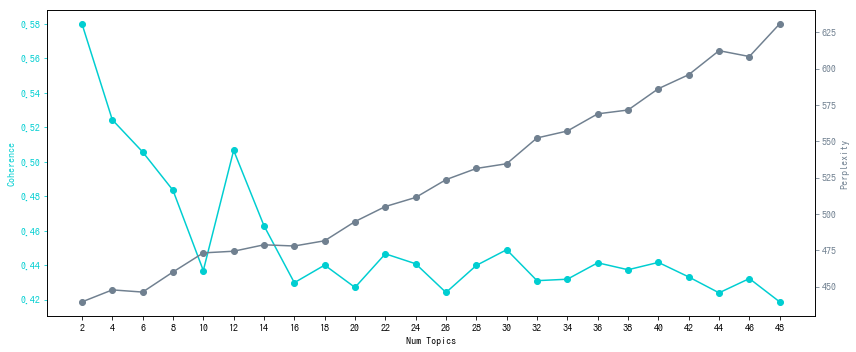

In [12]:
x = range(start, limit, step)
 
fig, ax1 = plt.subplots(figsize=(12,5))
 
c1 = 'darkturquoise'
ax1.plot(x, coherence_vals, 'o-', color=c1)
ax1.set_xlabel('Num Topics')
ax1.set_ylabel('Coherence', color=c1); ax1.tick_params('y', colors=c1)
 
c2 = 'slategray'
ax2 = ax1.twinx()
ax2.plot(x, perplexity_vals, 'o-', color=c2)
ax2.set_ylabel('Perplexity', color=c2); ax2.tick_params('y', colors=c2)
 
ax1.set_xticks(x)
fig.tight_layout()
plt.show()

In [13]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=8, random_state=0)

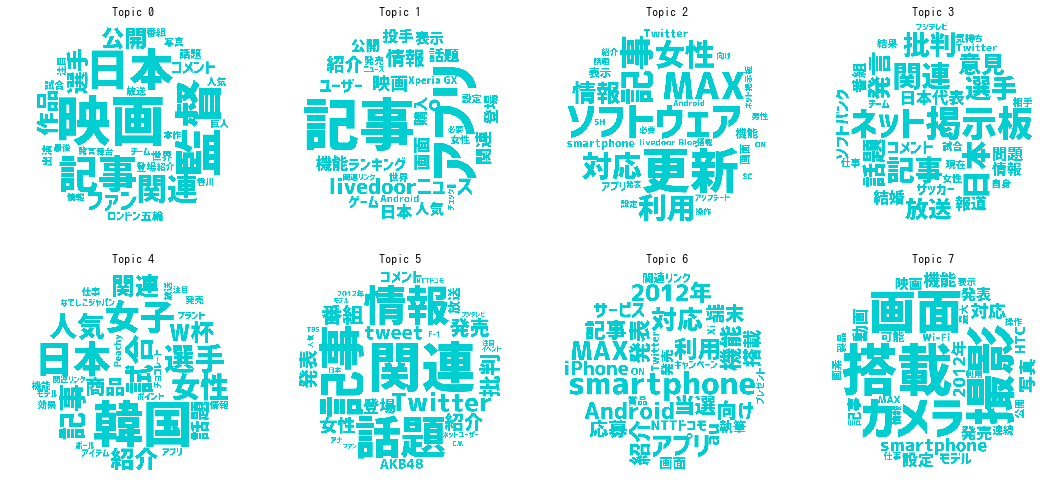

In [15]:
from wordcloud import WordCloud
from PIL import Image
 
fig, axs = plt.subplots(ncols=4, nrows=int(lda_model.num_topics/4), figsize=(15,7))
axs = axs.flatten()
 
def color_func(word, font_size, position, orientation, random_state, font_path):
    return 'darkturquoise'
 
mask = np.array(Image.open('ball.png'))
 
for i, t in enumerate(range(lda_model.num_topics)):
 
    x = dict(lda_model.show_topic(t, 30))
    im = WordCloud(
        font_path='logotypejp_mp_b_1.1.ttf',
        background_color='white',
        color_func=color_func,
        mask=mask,
        random_state=0
    ).generate_from_frequencies(x)
    axs[i].imshow(im)
    axs[i].axis('off')
    axs[i].set_title('Topic '+str(t))
        
plt.tight_layout()
plt.show()

In [18]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [20]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, sort_topics=False)
vis

/opt/conda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.162112  0.093138       1        1  16.580156
1      0.022770  0.047373       2        1   6.955677
2      0.112558 -0.054375       3        1  13.814015
3     -0.169004 -0.101964       4        1  13.812232
4     -0.020803  0.003380       5        1  11.776992
5     -0.019535 -0.023985       6        1   8.008977
6      0.147211 -0.012512       7        1  17.140827
7      0.088916  0.048944       8        1  11.911119, topic_info=      Category         Freq           Term        Total  loglift  logprob
term                                                                     
5364   Default  3333.000000             更新  3333.000000  30.0000  30.0000
5683   Default  2298.000000         ソフトウェア  2298.000000  29.0000  29.0000
27562  Default  2528.000000         ネット掲示板  2528.000000  28.0000  28.0000
1254   Default  2277.000000             韓国  2277.000000  27.0000  27.0000
981    Default  3448.000000            MAX  3448.000000  26.0000  26.0000
6534   Default  3925.000000     smartphone  3925.000000  25.0000  25.0000
1496   Default  3209.000000             映画  3209.000000  24.0000  24.0000
8614   Default  3353.000000            アプリ  3353.000000  23.0000  23.0000
884    Default  2645.000000             搭載  2645.000000  22.0000  22.0000
1287   Default  1541.000000             批判  1541.000000  21.0000  21.0000
3856   Default  2124.000000             選手  2124.000000  20.0000  20.0000
5645   Default  2205.000000             監督  2205.000000  19.0000  19.0000
5938   Default  2634.000000             画面  2634.000000  18.0000  18.0000
636    Default  4069.000000             関連  4069.000000  17.0000  17.0000
50     Default  3577.000000             対応  3577.000000  16.0000  16.0000
9904   Default   924.000000             当選   924.000000  15.0000  15.0000
12760  Default   606.000000           日本代表   606.000000  14.0000  14.0000
17644  Default   438.000000   livedoorニュース   438.000000  13.0000  13.0000
1037   Default  3158.000000             機能  3158.000000  12.0000  12.0000
10084  Default  1983.000000        Android  1983.000000  11.0000  11.0000
6961   Default  1695.000000             撮影  1695.000000  10.0000  10.0000
1154   Default  2685.000000             利用  2685.000000   9.0000   9.0000
2293   Default  1990.000000             表示  1990.000000   8.0000   8.0000
4942   Default  1354.000000             試合  1354.000000   7.0000   7.0000
955    Default  1196.000000             発言  1196.000000   6.0000   6.0000
18773  Default   941.000000  livedoor Blog   941.000000   5.0000   5.0000
1031   Default  4111.000000             日本  4111.000000   4.0000   4.0000
902    Default  1939.000000             設定  1939.000000   3.0000   3.0000
15613  Default   985.000000         アップデート   985.000000   2.0000   2.0000
1685   Default  2811.000000        Twitter  2811.000000   1.0000   1.0000
...        ...          ...            ...          ...      ...      ...
18496   Topic8   128.905777           事前予約   205.199829   1.6628  -6.9510
556     Topic8   156.950668            カフェ   264.589783   1.6054  -6.7542
14999   Topic8   387.260193          Wi-Fi   865.470154   1.3235  -5.8510
5220    Topic8   379.121246             連続   843.710693   1.3277  -5.8723
5938    Topic8   784.980835             画面  2634.350098   0.9170  -5.1444
216     Topic8   721.549438             写真  2362.336914   0.9417  -5.2287
17605   Topic8   113.769470  モバイルWi-Fiルーター   182.564087   1.6548  -7.0759
902     Topic8   578.493652             設定  1939.085327   0.9182  -5.4497
50      Topic8   736.554199             対応  3577.338867   0.5473  -5.2081
11865   Topic8   586.853149          2012年  2578.773438   0.6474  -5.4353
6534    Topic8   756.794922     smartphone  3925.184570   0.4816  -5.1810
2372    Topic8   337.308563             製品  1091.759888   0.9531  -5.9891
1037    Topic8   642.235718             機能  3158.830078   0.5347  -5.3452
1706    Topic

In [21]:
#pyLDAvis.save_html(vis, 'pyldavis_output.html')

In [22]:
!python --version

Python 3.6.3 :: Anaconda, Inc.


In [23]:
!pip freeze

alembic==0.9.9
appdirs==1.4.3
asn1crypto==0.24.0
async-generator==1.10
atomicwrites==1.2.1
attrs==18.1.0
Automat==0.0.0
backcall==0.1.0
beautifulsoup4==4.6.3
bleach==2.1.4
bokeh==0.12.16
boto==2.49.0
boto3==1.9.71
botocore==1.12.71
bz2file==0.98
certifi==2018.8.24
cffi==1.11.5
chainer==5.1.0
chardet==3.0.4
cloudpickle==0.5.5
conda==4.5.8
constantly==15.1.0
cryptography==2.2.1
cycler==0.10.0
Cython==0.28.5
dask==0.19.0
decorator==4.3.0
dill==0.2.8.2
docutils==0.14
entrypoints==0.2.3
fastcache==1.0.2
filelock==3.0.10
funcy==1.11
future==0.17.1
gensim==3.6.0
gmpy2==2.0.8
h5py==2.7.1
html5lib==1.0.1
hyperlink==17.3.1
idna==2.7
imageio==2.3.0
incremental==17.5.0
ipykernel==4.8.2
ipython==6.5.0
ipython-genutils==0.2.0
ipywidgets==7.2.1
jedi==0.12.1
Jinja2==2.10
jmespath==0.9.3
joblib==0.13.0
jsonschema==2.6.0
jupyter-client==5.2.3
jupyter-core==4.4.0
jupyterhub==0.9.2
jupyterlab==0.34.0
jupyterlab-launcher==0.13.1
kiwisolver==1.0.1
llvmlite==0.23.0
Mako==1.0.7
MarkupSafe==1.0
matplotlib==3.0